###### <h1 style = "color : Red"> Bike Sharing Assignment - Linear Regression - Case Study </h1>
<h3 style = "color : Blue">  Submitted by: K Lalithabai Sobha </h3>
<h4 style = "color : Blue">  Date of Submission:  26/11/2024 </h4>


<h3 style = "color : maroon">  Problem Statement </h3>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.   
<h3 style = "color : maroon">  Aim </h3>
To model the demand for shared bikes with the available independent variables using linear regression to understand the following: 

 -    Which variables are significant in predicting the demand for shared bikes.
 -    How well those variables describe the bike demands
<h3 style = "color : maroon">  Goal </h3>
The model will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



<h4 style = "color : Blue">  Importing the necessary Libraries </h4>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

<h2 style = "color : Blue">  Step 1: Reading and Understanding the Data </h2>


In [3]:
df_bike_orig = pd.read_csv('day.csv')

In [4]:
df_bike_orig.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### day.csv have the following fields:
	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

  

Inspect the various aspects of the bike dataframe

The column `instant` can be dropped.

####  cnt is the target variable
cnt = casual + registered 

Hence dropping `casual` and `registered`

In [5]:
df_bike = df_bike_orig.drop(['instant','casual','registered'],axis=1)

### Data inspection

In [6]:
df_bike.shape

(730, 13)

In [7]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [8]:
# Converting the datatype of dteday from object to datetime
df_bike.dteday= pd.to_datetime(df_bike.dteday, dayfirst=True)

In [9]:
df_bike.describe()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
min,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000
std,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647


In [10]:
df_bike.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

### There are no missing rows or missing values. The dataset is clean.

In [11]:
catg_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [12]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#### Creating Derived Metrics

In [13]:
df_bike["Quarter1"] = df_bike["mnth"].apply(lambda x: 1 if x<=3 else 0)
df_bike["Quarter2"] = df_bike["mnth"].apply(lambda x: 1 if 4<=x<=6 else 0)
df_bike["Quarter3"] = df_bike["mnth"].apply(lambda x: 1 if 7<=x<=9 else 0)
df_bike["Quarter4"] = df_bike["mnth"].apply(lambda x: 1 if 10<=x<=12 else 0)

#Creating weekend derived column from weekday.
df_bike["weekend"] = df_bike["weekday"].apply(lambda x: 0 if 1<=x<=5 else 1)
df_bike.head()



,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Quarter1,Quarter2,Quarter3,Quarter4,weekend
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


<h2 style = "color : Blue">  Step 2: EDA (Visualising the Data) </h2>

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

### Target variable - cnt

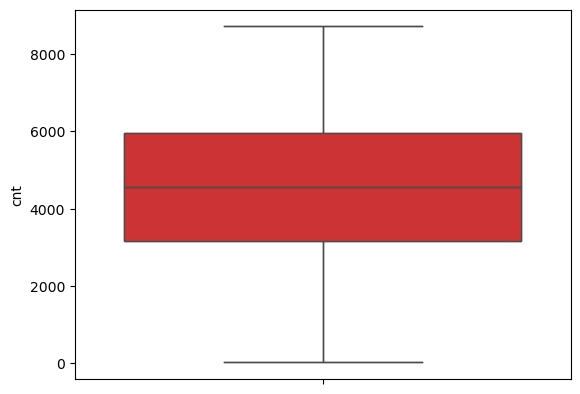

In [14]:
sns.boxplot(df_bike['cnt'])
sns.boxplot(df_bike['cnt'], palette="Set1")
plt.show()

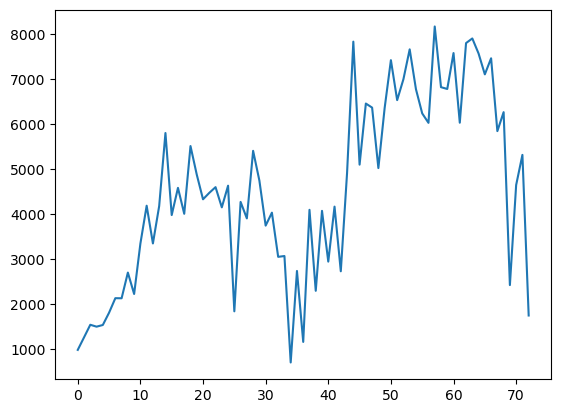

In [15]:
# find the trend of cnt 
plt.plot((np.array(df_bike.cnt)[::10]))
plt.show()

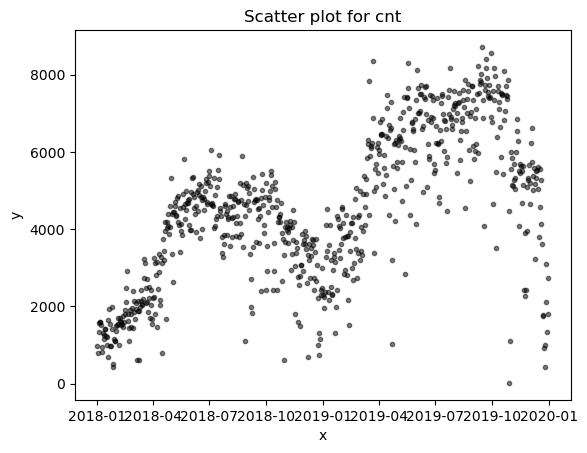

In [16]:
# Scatter Plot (dteday vs cnt)
colors = (0,0,0)
area = np.pi*3
plt.scatter(df_bike.dteday, df_bike.cnt, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot for cnt')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Outlier Analysis of Numerical variables

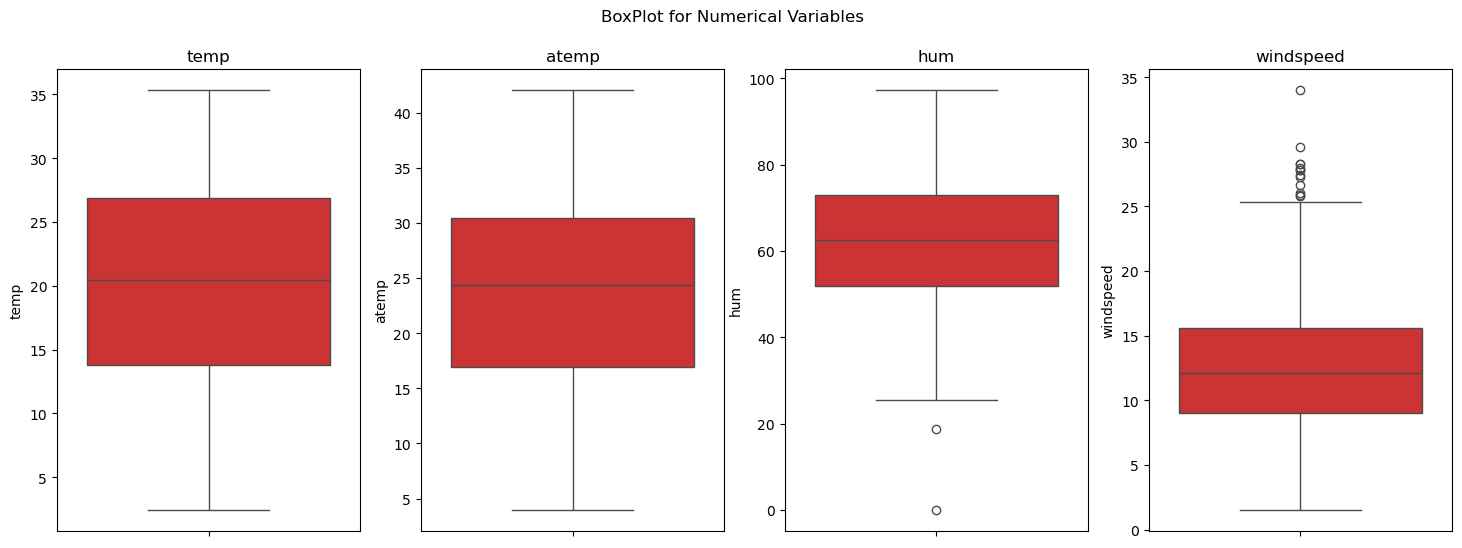

In [18]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
fig, axes = plt.subplots(1,4, figsize=(18, 6))
fig.suptitle('BoxPlot for Numerical Variables')

for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(ax=ax,y=col,  data = df_bike, palette="Set1")
    ax.set_title(col)

plt.show()

In [19]:
# There are outliers in windspeed.
df_bike.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [20]:
# The range of values in windspeed is 1.5-34 with mean value as 12.763
Q1= np.percentile(df_bike.windspeed,25)
Q3= np.percentile(df_bike.windspeed,75)
IQR= Q3-Q1 
Lower_Whisker = Q1-2*IQR  # considering 2 instead of 1.5
Upper_Whisker = Q3+2*IQR
Upper_Whisker

28.79346775

In [21]:
# Check how many records are there where windspeed > Upper_Whisker
df_bike[df_bike.windspeed > Upper_Whisker].windspeed.count()

2

There are only 2 records as outliers in windspped. No need to remove them as it will get handled during the minmax scaling.

### Univariate Analysis

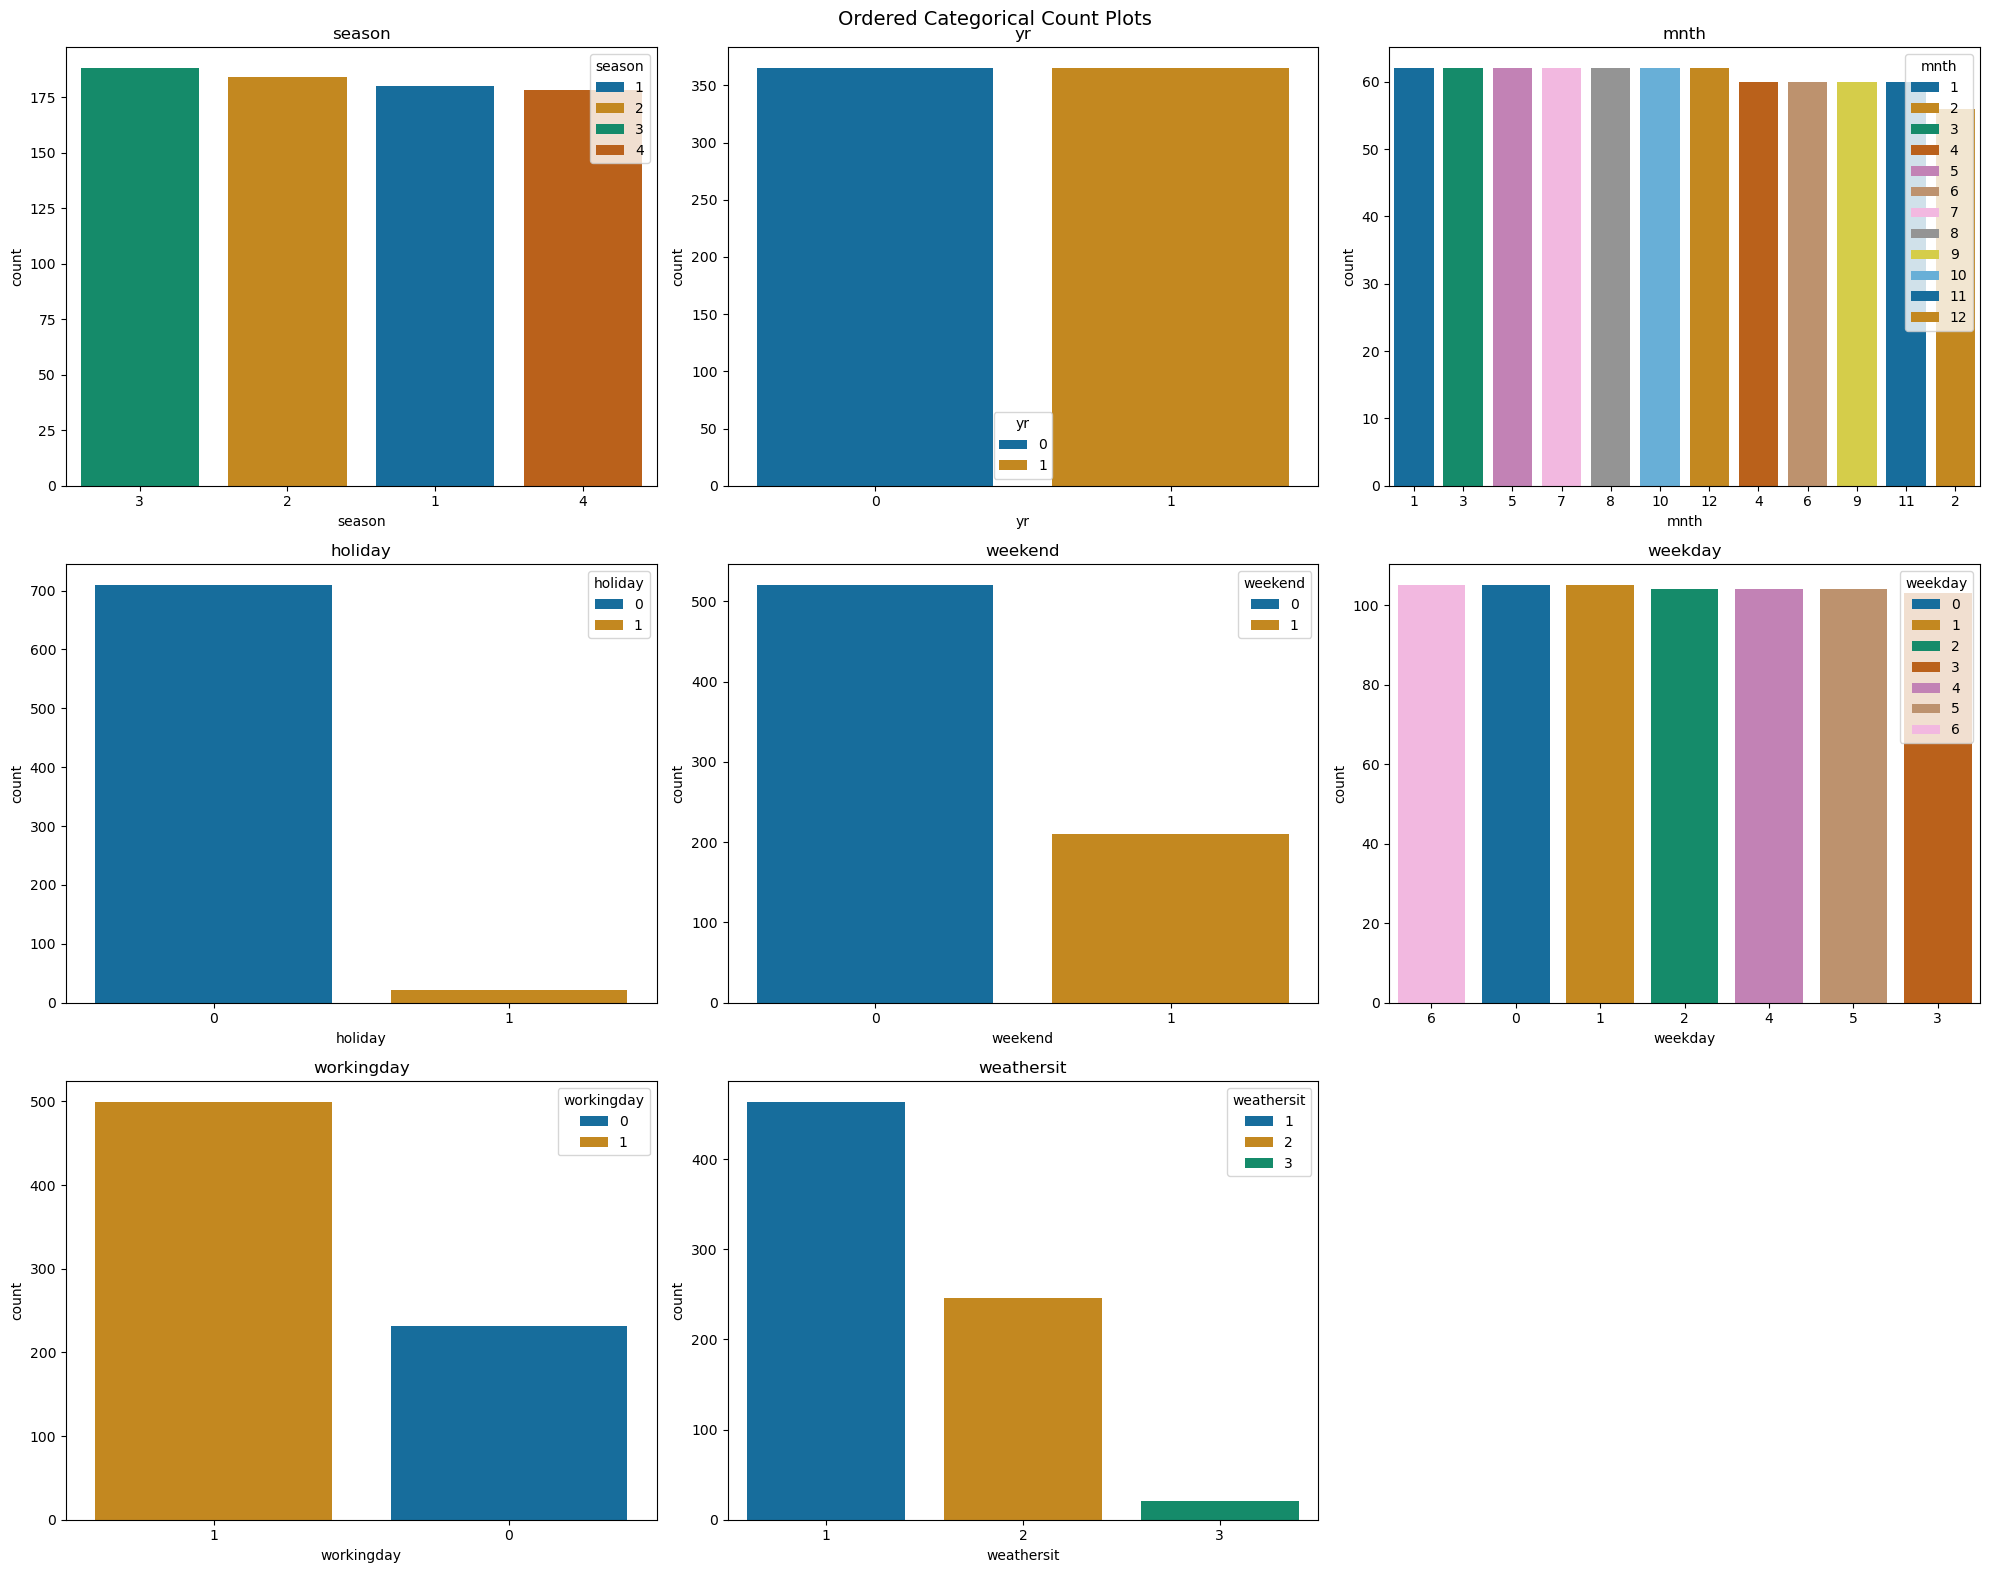

In [22]:
catg_columns = ['season', 'yr', 'mnth', 'holiday','weekend', 'weekday', 'workingday', 'weathersit']
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Ordered Categorical Count Plots',fontsize=14)
for col, ax in zip(catg_columns, axes.flat):
    sns.countplot(data=df_bike,x=col,hue = col,order= df_bike[col].value_counts().index, palette="colorblind", ax=ax)
    ax.set_title(col, fontsize=12)


fig.delaxes(axes[2][2])
fig.tight_layout()
plt.show()

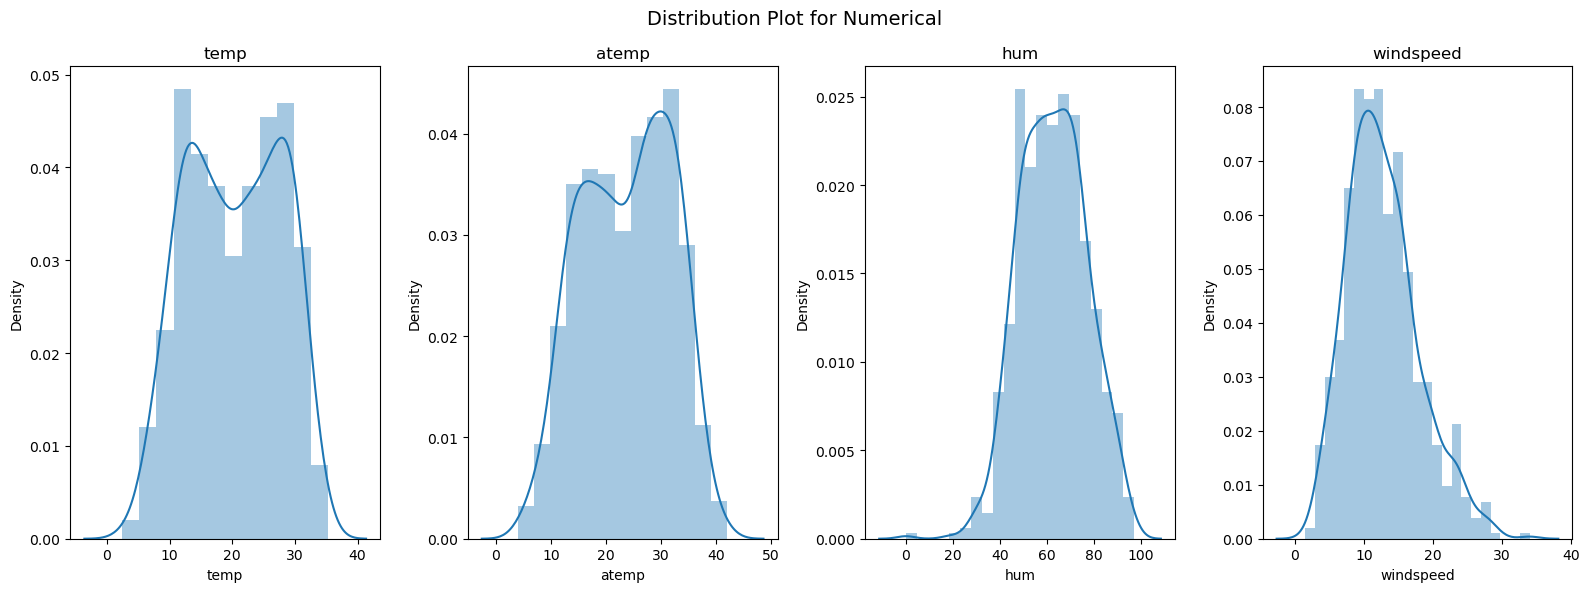

In [23]:
catg_columns = ['season', 'yr', 'mnth', 'holiday','weekend', 'weekday', 'workingday', 'weathersit']
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
fig.suptitle('Distribution Plot for Numerical',fontsize=14)
for col, ax in zip(num_cols, axes.flat):
    sns.distplot(df_bike[col],ax=ax)
    ax.set_title(col, fontsize=12)

fig.tight_layout()
plt.show()


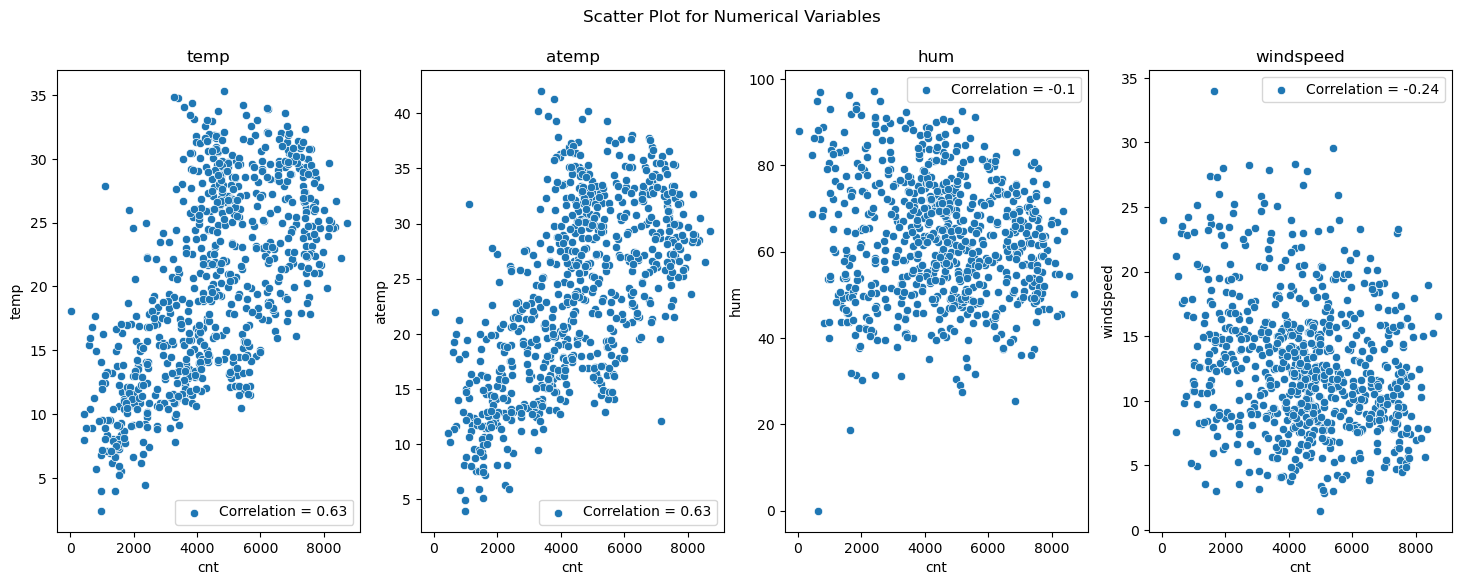

In [24]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
fig, axes = plt.subplots(1,4, figsize=(18, 6))
fig.suptitle('Scatter Plot for Numerical Variables')

for col, ax in zip(num_cols, axes.flat):
    sns.scatterplot(ax=ax,data=df_bike, x='cnt', y=col, label=f'Correlation = {np.round(np.corrcoef(df_bike['cnt'],df_bike[col])[0,1], 2)}')
    ax.set_title(col)

plt.show()

### Bivariate Analysis

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

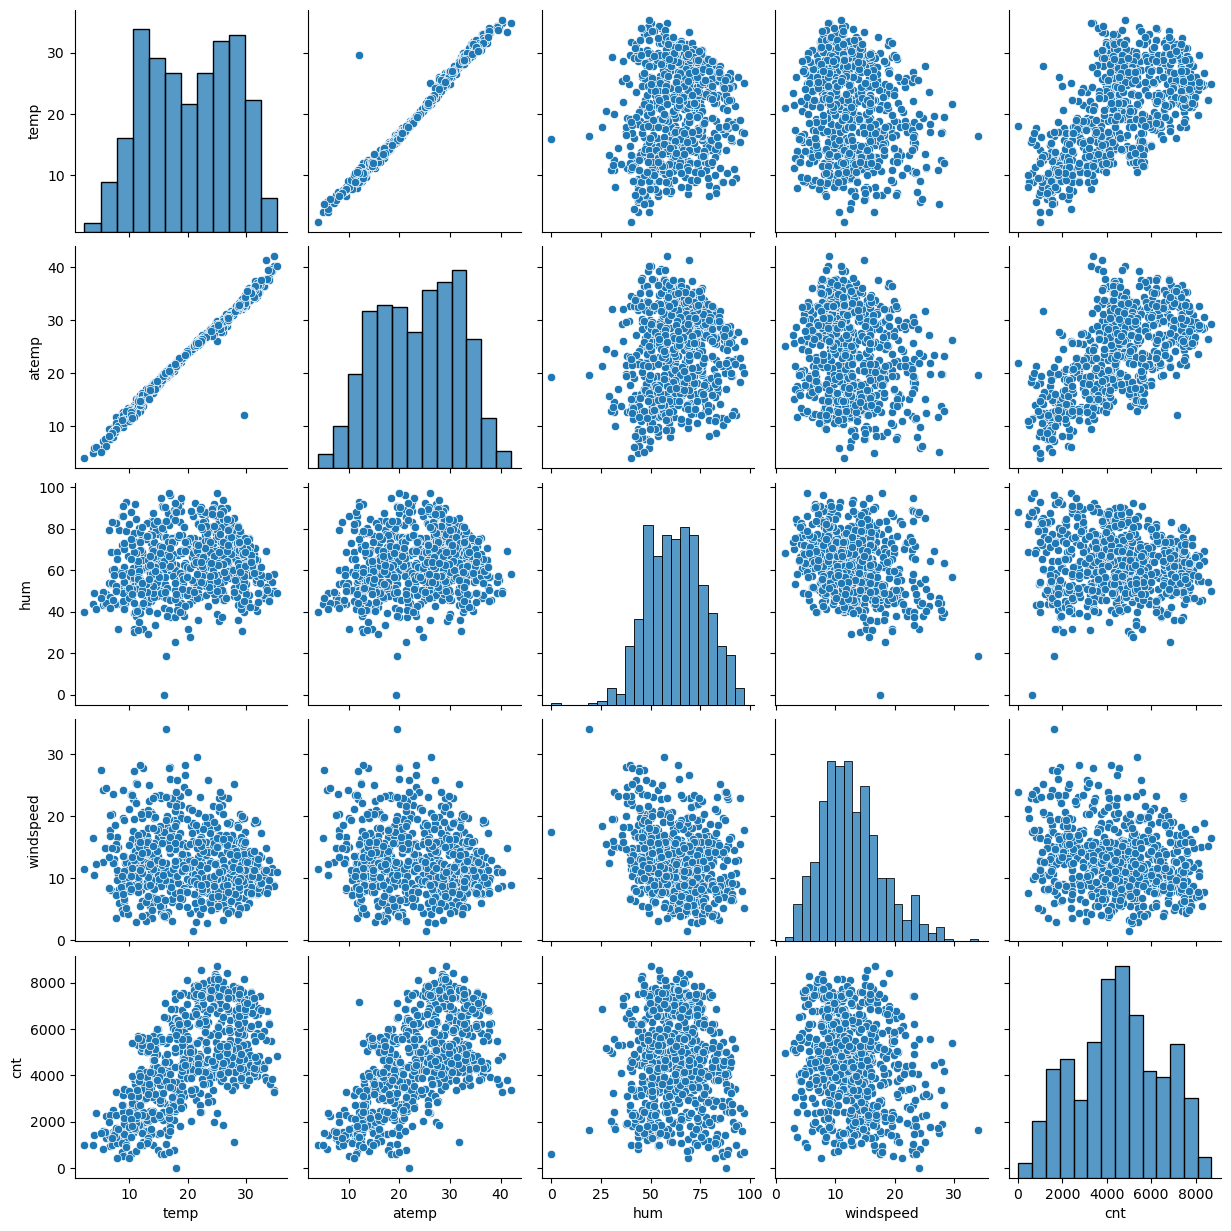

In [25]:
num_cols = ['temp', 'atemp', 'hum', 'windspeed','cnt']
sns.pairplot(df_bike[num_cols])
plt.show()

In [26]:
corr = df_bike[num_cols].corr()
corr

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


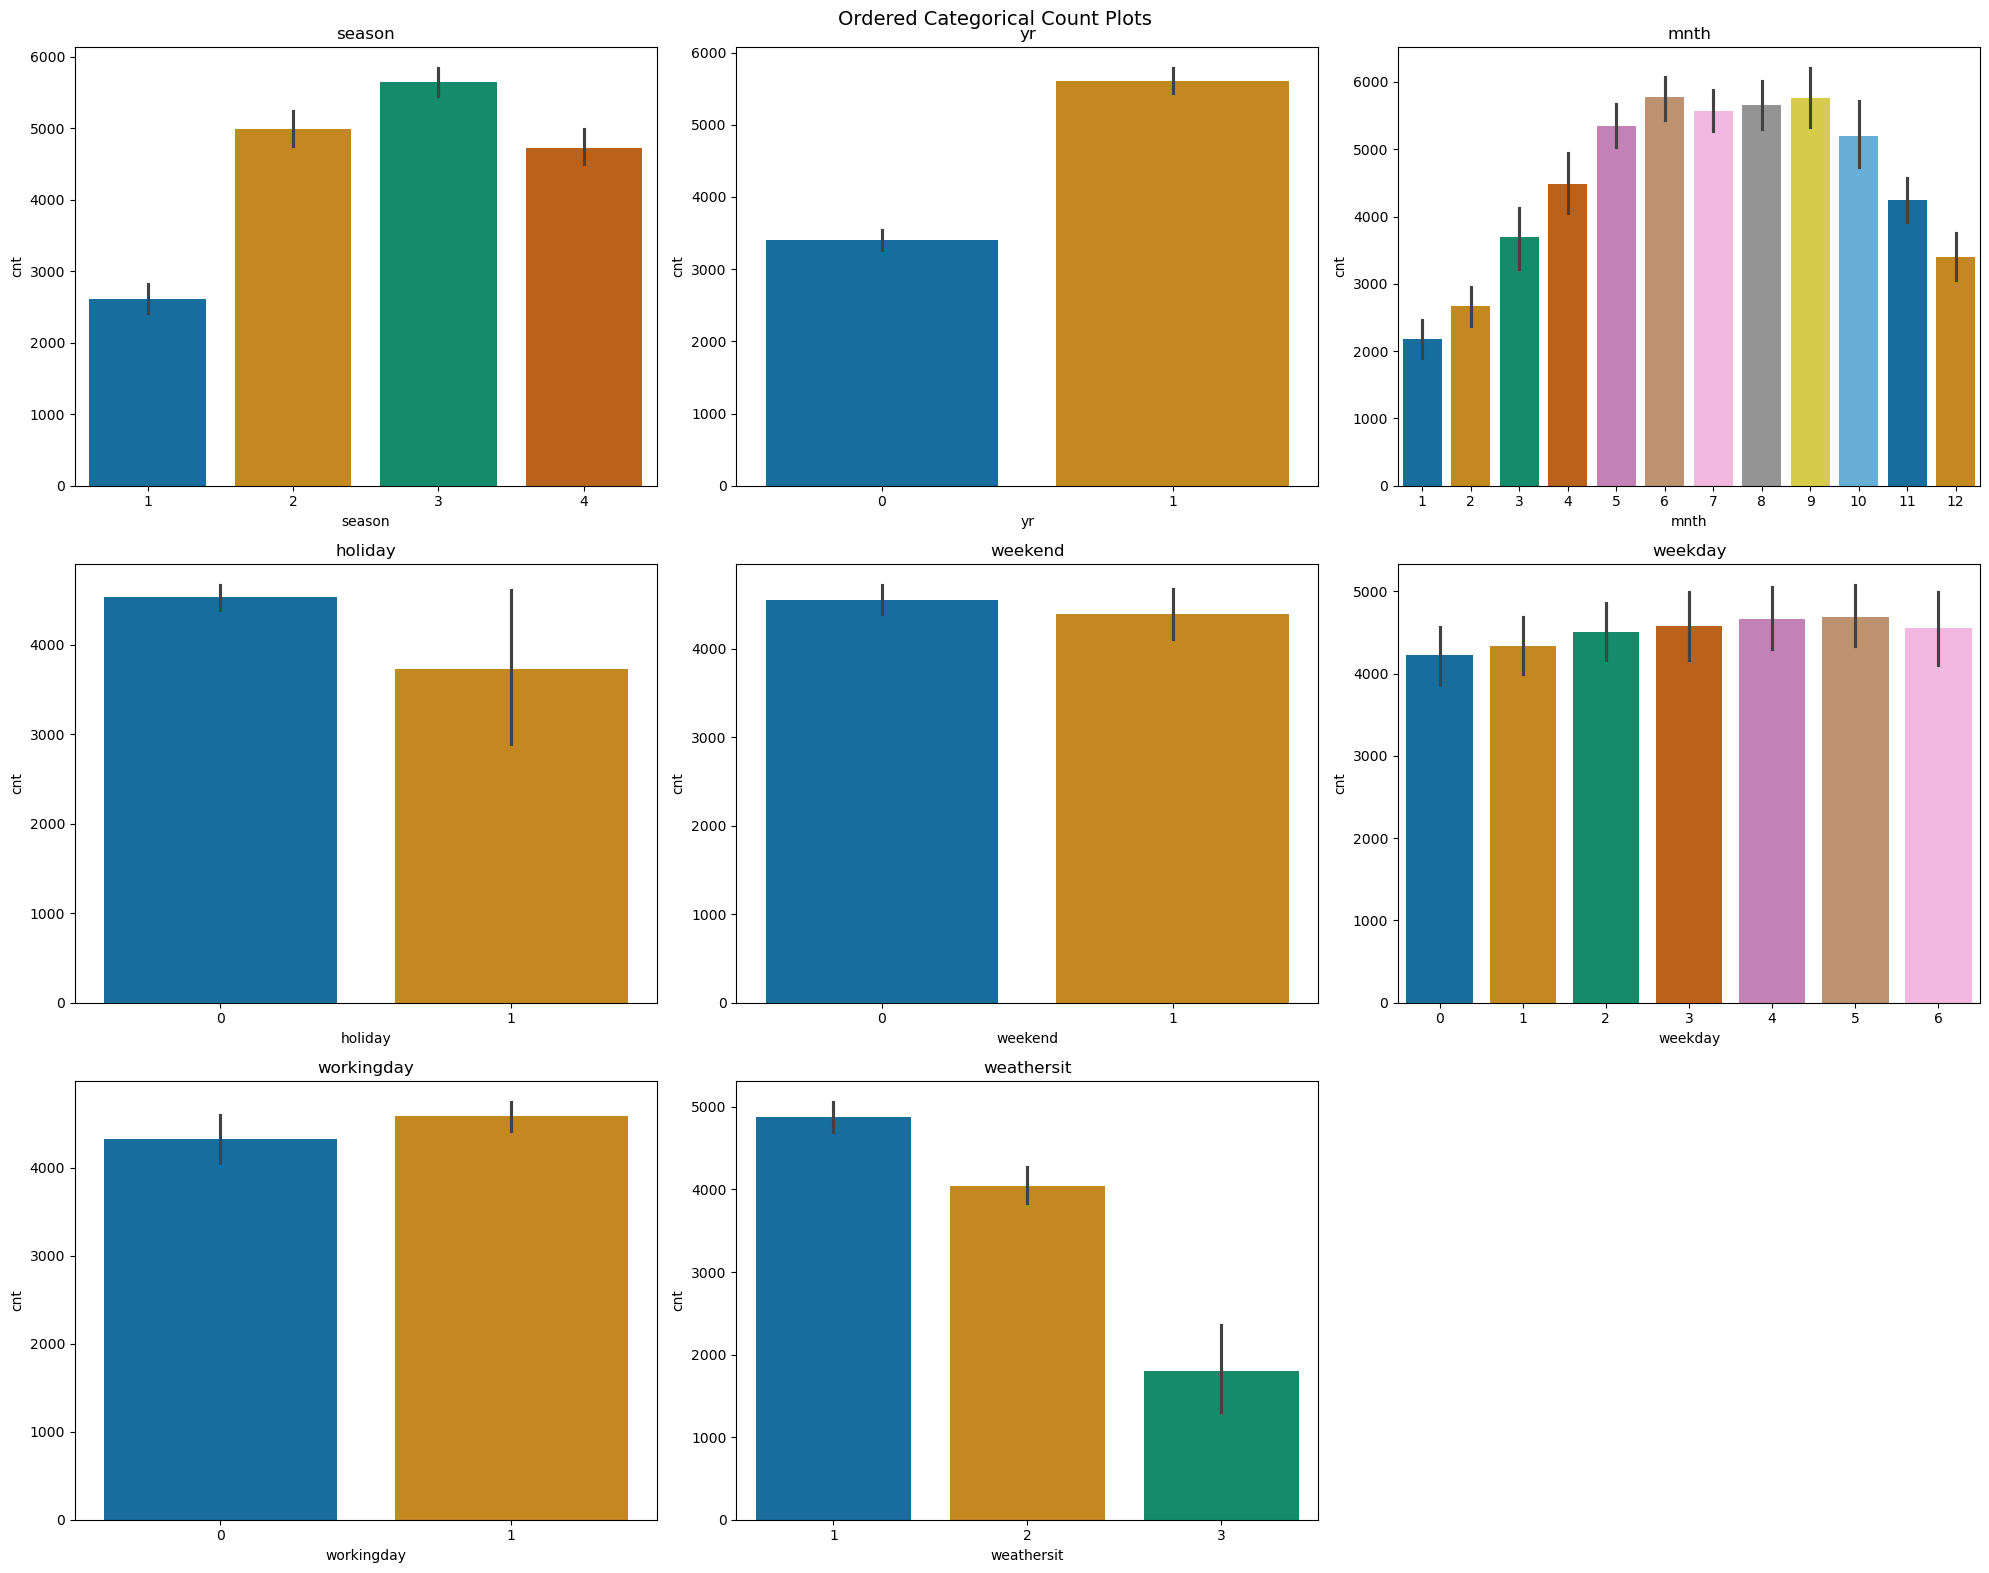

In [27]:
catg_columns = ['season', 'yr', 'mnth', 'holiday','weekend', 'weekday', 'workingday', 'weathersit']
fig, axes = plt.subplots(3, 3, figsize=(20, 16))
fig.suptitle('Ordered Categorical Count Plots',fontsize=14)
for col, ax in zip(catg_columns, axes.flat):
    sns.barplot(data=df_bike,x = col,y ='cnt',palette="colorblind", ax=ax)
    ax.set_title(col, fontsize=12)


fig.delaxes(axes[2][2])
fig.tight_layout()
plt.show()

Visualising Categorical Variables

There are a few categorical variables as well. Let's make a boxplot for some of these variables.

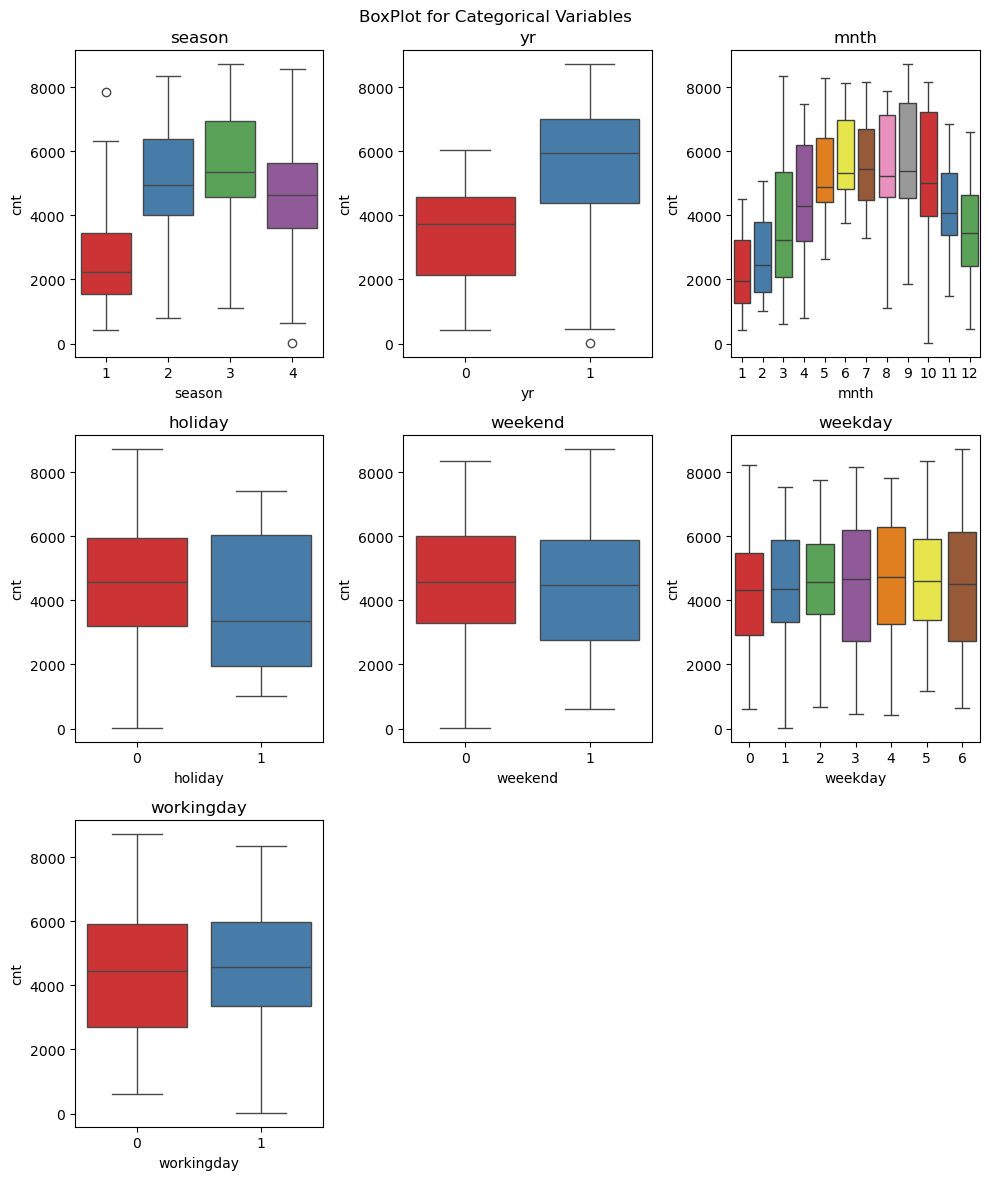

In [28]:
fig, axes = plt.subplots(3,3, figsize=(10, 12))
fig.suptitle('BoxPlot for Categorical Variables')

for col, ax, i in zip(catg_columns, axes.flat, range(len(catg_columns))):
    sns.boxplot(ax=ax,x=col, y = 'cnt', data = df_bike, palette="Set1")
    ax.set_title(col)

fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
fig.tight_layout()
plt.show()

<h2 style = "color : Blue">  Step 3: Data Preparation </h2>

In [29]:
df_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Quarter1,Quarter2,Quarter3,Quarter4,weekend
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


### Dummy Variables

Create dummy variables for categorical variables

In [30]:
# Season
df_bike.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

There are 4 distinct values for season. 

Get the dummy variables for the feature 'season' and store it in a new variable - 'seasons'

Now, we don't need Four columns. 
You can drop the `Spring` column, as the type of Season can be identified with just the last three columns where — 
- `000` will correspond to `Spring`
- `100` will correspond to `Summer`
- `010` will correspond to `Fall`
- `001` will correspond to `Winter`


In [31]:
# Creating Dummy variables without dropping the first variable

seasons = pd.get_dummies(df_bike.season, drop_first = True,dtype=int)
seasons.rename(columns={ 2:'Summer', 3:'Fall', 4:'Winter'},inplace=True)

In [32]:
seasons.head()

,Summer,Fall,Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [33]:
# Add the results to the original df_Bike dataframe

df_bike = pd.concat([df_bike, seasons], axis = 1)

In [34]:
df_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,windspeed,cnt,Quarter1,Quarter2,Quarter3,Quarter4,weekend,Summer,Fall,Winter
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,...,10.749882,985,1,0,0,0,1,0,0,0
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,...,16.652113,801,1,0,0,0,1,0,0,0
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,...,16.636703,1349,1,0,0,0,0,0,0,0
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,...,10.739832,1562,1,0,0,0,0,0,0,0
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,...,12.522300,1600,1,0,0,0,0,0,0,0


In [35]:
# weathersit
df_bike.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

There are 3 distinct values for weathe-situation in the given data

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

However there is one more weather condition 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
the data of which is missing in the data given

We can drop the first value as the situation of weather can be identified by 2nd and 3rd values

#Now make the dummy variable for weathersit with drop_First as True to identify the second and third variable
weather_type = pd.get_dummies(df_bike.weathersit, drop_first = True)
weather_type.rename(columns={2:"MistCloud", 3:"LightSnowRain"},inplace=True)
weather_type.head()


In [36]:
#Now make the dummy variable for weathersit with drop_First as True to identify the given weather situation. 
weather_type = pd.get_dummies(df_bike.weathersit, drop_first = True, dtype=int)
weather_type.rename(columns={2:"MistCloud", 3:"LightSnowRain"},inplace=True)
weather_type.head()

,MistCloud,LightSnowRain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [37]:
# Add the results to the original df_Bike dataframe

df_bike = pd.concat([df_bike, weather_type], axis = 1)

In [38]:
df_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Quarter1,Quarter2,Quarter3,Quarter4,weekend,Summer,Fall,Winter,MistCloud,LightSnowRain
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,...,1,0,0,0,1,0,0,0,1,0
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,...,1,0,0,0,1,0,0,0,1,0
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,...,1,0,0,0,0,0,0,0,0,0
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,...,1,0,0,0,0,0,0,0,0,0
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,...,1,0,0,0,0,0,0,0,0,0


In [542]:
#Now make the dummy variable for month with drop_First as True to identify the different months
#month_name = pd.get_dummies(df_bike.mnth, drop_first = True, dtype=int)
#month_name.rename(columns={2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"},inplace=True)
#month_name.head()


In [543]:
#df_bike = pd.concat([df_bike, month_name], axis = 1)

In [544]:
#df_bike.head()

In [39]:
df_bike_orig.groupby('weekday')['cnt'].sum()

weekday
0    444027
1    455503
2    469109
3    471214
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [40]:
df_bike_orig.groupby('workingday')['cnt'].sum()

workingday
0    1000269
1    2290576
Name: cnt, dtype: int64

In [41]:
df_bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'Quarter1',
       'Quarter2', 'Quarter3', 'Quarter4', 'weekend', 'Summer', 'Fall',
       'Winter', 'MistCloud', 'LightSnowRain'],
      dtype='object')

In [42]:
df_bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Quarter1,Quarter2,Quarter3,Quarter4,weekend,Summer,Fall,Winter,MistCloud,LightSnowRain
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,...,1,0,0,0,1,0,0,0,1,0
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,...,1,0,0,0,1,0,0,0,1,0
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,...,1,0,0,0,0,0,0,0,0,0
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,...,1,0,0,0,0,0,0,0,0,0
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,...,1,0,0,0,0,0,0,0,0,0


In [43]:
df_bike.holiday.value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [44]:
df_bike.weekend.value_counts()

weekend
0    520
1    210
Name: count, dtype: int64

In [551]:
#Creating weekend derived column from weekday.
#df_bike["weekend"] = df_bike["weekday"].apply(lambda x: 0 if 1<=x<=5 else 1)
#df_bike.head()

In [45]:
df_bike.workingday.value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

##### Dropping unnecessary columns 
 - `dteday` - can be dropped as there are yr,mnth,weekday etc. to identify the date
  - `season`- not needed as we have created the dummy variabe from this
 - `weathersit` - not needed as we have created the dummy variable from this
 - `mnth` - not needed as we have created Quarter dummy variable from this
 - `weekday` - not needed as we there is not much difference in cnt values across the days as per th EDA 
 - `holiday` - not needed as this can be identified from the values of Workingday
 - `temp` - temp and atemp is highly correlated. Hence temp can be removed
 - `Quarter1` - can be dropped as it can be identified by Quarter2,Quarter3,Quarter4


In [46]:
#Dropping column mnth since we have already created dummies.

df_bike.drop(columns=['dteday','season','weathersit','mnth','weekday','holiday','temp','Quarter1'],axis=1,inplace =True)


In [47]:
df_bike.columns

Index(['yr', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'Quarter2',
       'Quarter3', 'Quarter4', 'weekend', 'Summer', 'Fall', 'Winter',
       'MistCloud', 'LightSnowRain'],
      dtype='object')

In [48]:
# Re Ordering the columns
df_bike = df_bike.reindex(columns=['yr', 'workingday', 'weekend', 'Summer', 'Fall','Winter', 
       'MistCloud', 'LightSnowRain', 'Quarter2','Quarter3', 'Quarter4',
        'atemp', 'hum', 'windspeed', 'cnt']
      )

In [49]:
df_bike.head()

,yr,workingday,weekend,Summer,Fall,Winter,MistCloud,LightSnowRain,Quarter2,Quarter3,Quarter4,atemp,hum,windspeed,cnt
0,0,0,1,0,0,0,1,0,0,0,0,18.18125,80.5833,10.749882,985
1,0,0,1,0,0,0,1,0,0,0,0,17.68695,69.6087,16.652113,801
2,0,1,0,0,0,0,0,0,0,0,0,9.47025,43.7273,16.636703,1349
3,0,1,0,0,0,0,0,0,0,0,0,10.60610,59.0435,10.739832,1562
4,0,1,0,0,0,0,0,0,0,0,0,11.46350,43.6957,12.522300,1600


Check Colinaerity between independent varaibles

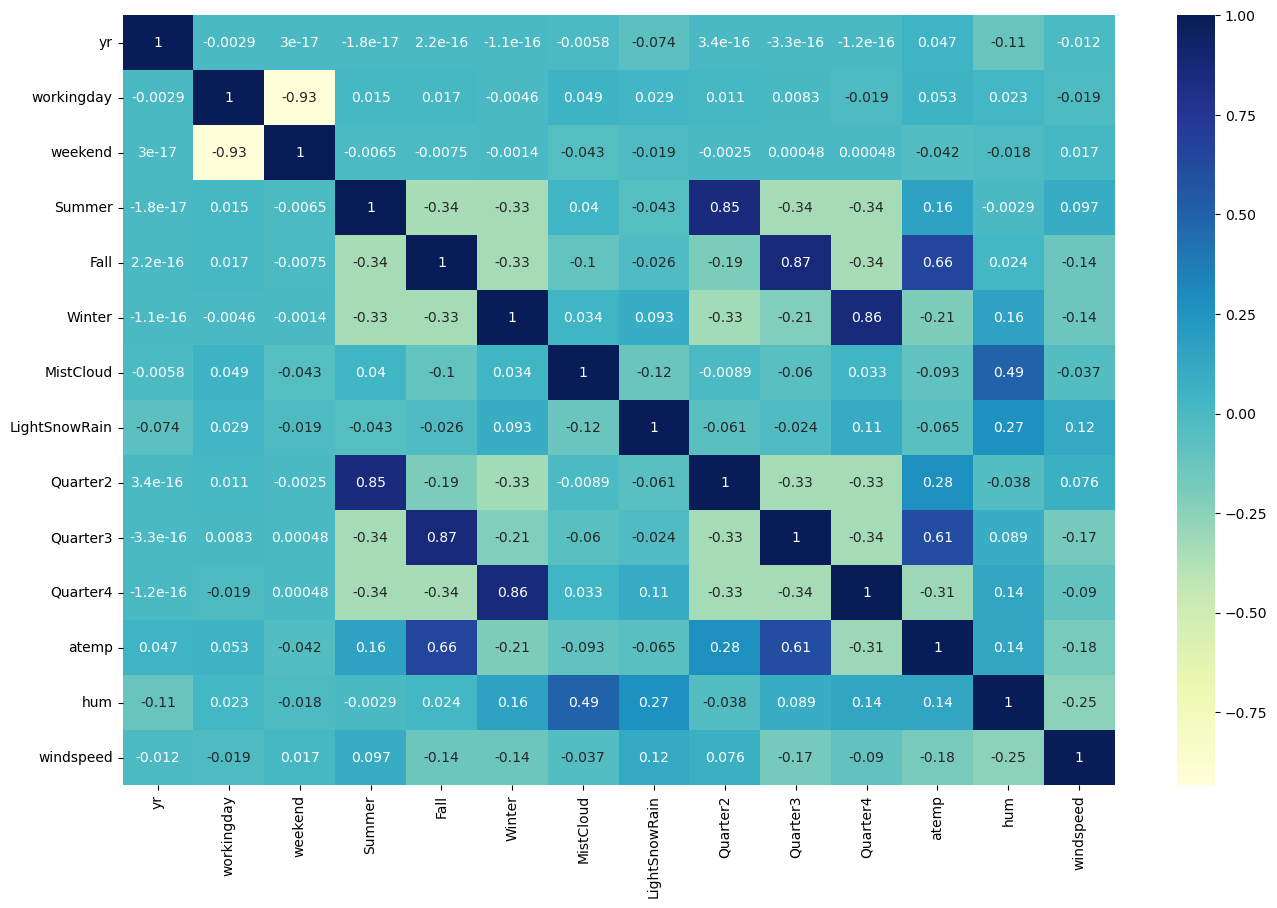

In [50]:
cols= ['yr', 'workingday', 'weekend', 'Summer', 'Fall','Winter', 
       'MistCloud', 'LightSnowRain', 'Quarter2','Quarter3', 'Quarter4',
        'atemp', 'hum', 'windspeed']
corr = df_bike[cols].corr()
plt.figure(figsize = (16, 10))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

 - atemp  is having a correlation with Fall of 0.66
 - Summer is having correlation with Quarter2. Hence remove Quarter2
 - Fall is having correlation with Quarter3. Hence remove Quarter3
 - Winter is having correlation withQuarter4. Hence remove Quarter4
 - hum is having correlation with Mist+Cloudy
 - workingday and weekend is having very high correlation. Hence remove weekend
   

 - There are some correltion between the independent varaibles

In [51]:
df_bike.drop(columns=['weekend','Quarter2','Quarter3','Quarter4'],axis=1,inplace =True)

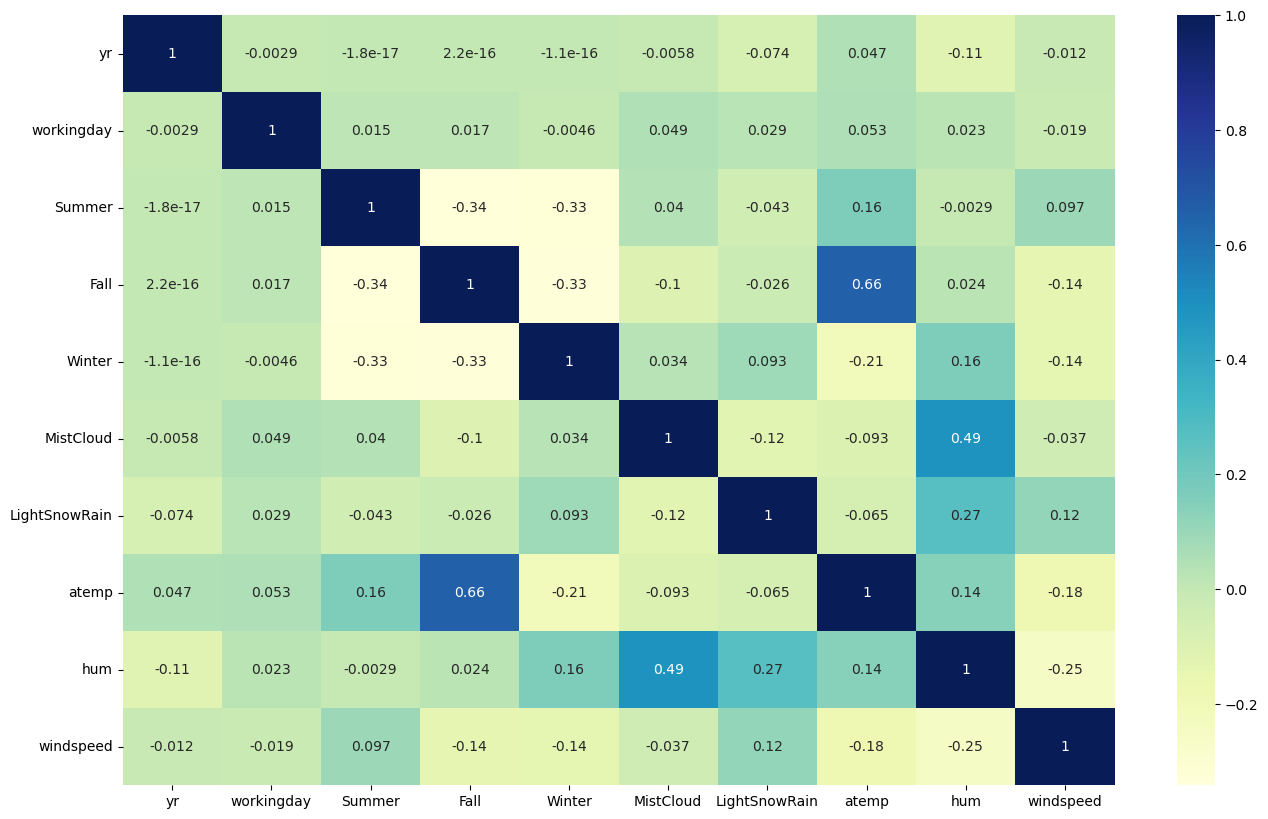

In [52]:
cols= ['yr', 'workingday', 'Summer', 'Fall','Winter', 
       'MistCloud', 'LightSnowRain','atemp', 'hum', 'windspeed']
corr = df_bike[cols].corr()
plt.figure(figsize = (16, 10))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

<h2 style = "color : Blue">  Step 4: Splitting the Data into Training and Testing Sets </h2>

The first basic step for regression is performing a train-test split.

In [54]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# Set seed for reproducibility
df_train, df_test = train_test_split(df_bike, train_size = 0.7, test_size = 0.3, random_state = 42)

In [55]:
df_train.head()

,yr,workingday,Summer,Fall,Winter,MistCloud,LightSnowRain,atemp,hum,windspeed,cnt
683,1,1,0,0,1,1,0,16.22460,62.0417,10.250129,5445
645,1,0,0,0,1,1,0,19.38040,70.9583,12.708493,5478
163,0,1,1,0,0,0,0,30.08270,49.4583,20.458450,5020
360,0,1,0,0,0,1,0,16.38165,76.2500,12.626150,1162
640,1,1,0,0,1,1,0,29.95665,79.3750,4.458569,7572


### Rescaling the Features 

By MinMax scaling.

In [56]:
scaler = MinMaxScaler()

In [57]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [58]:
df_train.head()

,yr,workingday,Summer,Fall,Winter,MistCloud,LightSnowRain,atemp,hum,windspeed,cnt
683,1,1,0,0,1,1,0,0.322150,0.639330,0.327101,0.605336
645,1,0,0,0,1,1,0,0.404998,0.731215,0.419004,0.609320
163,0,1,1,0,0,0,0,0.685963,0.509660,0.708724,0.554026
360,0,1,0,0,0,1,0,0.326273,0.785745,0.415925,0.088253
640,1,1,0,0,1,1,0,0.682653,0.817947,0.110593,0.862127


### Dividing into X and Y sets for the model building

In [59]:
y_train = df_train.pop('cnt')
X_train = df_train

In [60]:
X_train.head()

,yr,workingday,Summer,Fall,Winter,MistCloud,LightSnowRain,atemp,hum,windspeed
683,1,1,0,0,1,1,0,0.322150,0.639330,0.327101
645,1,0,0,0,1,1,0,0.404998,0.731215,0.419004
163,0,1,1,0,0,0,0,0.685963,0.509660,0.708724
360,0,1,0,0,0,1,0,0.326273,0.785745,0.415925
640,1,1,0,0,1,1,0,0.682653,0.817947,0.110593


In [61]:
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: cnt, dtype: float64

<h2 style = "color : Blue">  Step 5: Building a linear model </h2>

### Function Defintions

#### Running RFE with the output number of the variable equal to NoofSteps and returns featurelists which are best fitted

In [62]:
def RunLR_REF(XTrain,yTrain,NoofSteps):
   
    lm_rfe = LinearRegression()
    lm_rfe.fit(XTrain, yTrain)

    rfe = RFE(lm_rfe, step = NoofSteps)             # running RFE
    rfe = rfe.fit(XTrain, yTrain) 
    list(zip(XTrain.columns,rfe.support_,rfe.ranking_))
    col = XTrain.columns[rfe.support_]
    return col

#### Building model using statsmodel, for the detailed statistics

In [63]:
def RunLR_STAT(XTrain,yTrain):
    X_train_rfe = sm.add_constant(XTrain)  
    lm_stat = sm.OLS(yTrain,X_train_rfe).fit() 
    return lm_stat

#### Generate VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [64]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def GenerateVIF(XTrain):
    vif = pd.DataFrame()
    vif['Features'] = XTrain.columns
    vif['VIF'] = [variance_inflation_factor(XTrain.values, i) for i in range(XTrain.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)

    return vif

### RFE
Recursive feature elimination

First, using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [65]:
# Running RFE with the output number of the variable equal to 10
col = RunLR_REF(X_train,  y_train,10)
col

Index(['yr', 'Summer', 'Winter', 'LightSnowRain', 'atemp'], dtype='object')

In [66]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
lm_stat1 = RunLR_STAT(X_train_rfe,y_train)
print(lm_stat1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     342.0
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          2.20e-159
Time:                        23:04:08   Log-Likelihood:                 395.18
No. Observations:                 510   AIC:                            -778.4
Df Residuals:                     504   BIC:                            -753.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0415      0.015     -2.686

In [ ]:
# p Values are within the range

In [67]:
vif = GenerateVIF(X_train_rfe)
vif

,Features,VIF
4,atemp,2.49
0,yr,1.91
1,Summer,1.49
2,Winter,1.33
3,LightSnowRain,1.03


Now all the p values of the above variables and their corresponding VIF's are all within range. But the adjusted R Square value is only .770.

### Modelling using all the variables (Bottom-up Approach)



Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.


### Adding all the variables to the model

Here we are using the bottom-up approach

In [68]:
dropped_col=[]

### Model 1

In [69]:
#Building the First Linear Model
import statsmodels.api as sm

lr_1 = RunLR_STAT(X_train,y_train)
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     223.1
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          5.49e-177
Time:                        23:04:20   Log-Likelihood:                 451.13
No. Observations:                 510   AIC:                            -880.3
Df Residuals:                     499   BIC:                            -833.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1304      0.033      3.950

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

First check the VIF Values

In [70]:
vif = GenerateVIF(X_train)
vif

,Features,VIF
7,atemp,23.43
8,hum,15.87
3,Fall,6.40
9,windspeed,4.49
2,Summer,3.96
1,workingday,2.98
4,Winter,2.68
5,MistCloud,2.06
0,yr,2.04
6,LightSnowRain,1.20


### Dropping the variable and updating the model

In [ ]:
# p values are within the range. 
# atemp is having the highest VIF as 23.43 with a p value of 0.0
# Now we will drop the column atemp and check the model 

#### Model 2

In [71]:

X_train_1 = X_train.drop('atemp', axis=1)
dropped_col.append('atemp')

# Build a Second fitted model
lr_2 = RunLR_STAT(X_train_1,y_train)
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     170.8
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          2.44e-146
Time:                        23:04:37   Log-Likelihood:                 376.02
No. Observations:                 510   AIC:                            -732.0
Df Residuals:                     500   BIC:                            -689.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2268      0.037      6.091

In [72]:
# Calculate the VIFs again for the new model
vif = GenerateVIF(X_train_1)
vif

,Features,VIF
7,hum,10.91
8,windspeed,4.48
1,workingday,2.91
3,Fall,2.24
4,Winter,2.18
2,Summer,2.11
0,yr,2.01
5,MistCloud,1.95
6,LightSnowRain,1.14


In [73]:
# p values are within the range. 
# adjR2 value has reduced considerbaly
# Hence add atemp back and them remove hum

# Model 3

In [74]:
# adding the atemp and removing the hum value
# Now we will drop the column hum and check the model 
X_train_2 = X_train.drop('hum', axis=1)
dropped_col.remove('atemp')
dropped_col.append('hum')


# Build a Third fitted model
lr_3 = RunLR_STAT(X_train_2,y_train)
print(lr_3.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     241.5
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          1.00e-175
Time:                        23:05:13   Log-Likelihood:                 445.30
No. Observations:                 510   AIC:                            -870.6
Df Residuals:                     500   BIC:                            -828.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0435      0.021      2.064

In [75]:
# Calculate the VIFs again for the new model
vif = GenerateVIF(X_train_2)
vif

,Features,VIF
7,atemp,16.11
3,Fall,6.13
2,Summer,3.86
8,windspeed,3.84
1,workingday,2.89
4,Winter,2.64
0,yr,2.03
5,MistCloud,1.52
6,LightSnowRain,1.09


In [586]:
# p values are within the range.
# atemp is having highest VIF, but if we remove, it will reduce the adj. R2 value considerably.
# Hence drop Fall

# Model 4

In [76]:
# Now we will drop the column Fall (the next lower VIF) and check the model
X_train_3 = X_train_2.drop('Fall', axis=1)
dropped_col.append('Fall')


# Build a Fourth fitted model
lr_4 = RunLR_STAT(X_train_3,y_train)
print(lr_4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.3
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          2.69e-170
Time:                        23:05:42   Log-Likelihood:                 429.65
No. Observations:                 510   AIC:                            -841.3
Df Residuals:                     501   BIC:                            -803.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0161      0.021      0.764

In [77]:
# Calculate the VIFs again for the new model

vif = GenerateVIF(X_train_3)
vif

,Features,VIF
6,atemp,4.43
7,windspeed,3.74
1,workingday,2.85
0,yr,2.02
2,Summer,1.57
4,MistCloud,1.52
3,Winter,1.41
5,LightSnowRain,1.08


In [78]:
# p values are within the range except for const
# VIF are < 5

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

<h2 style = "color : Blue">  Step 6: Residual Analysis of the train data </h2>

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [79]:
X_train_lm = sm.add_constant(X_train_3)
y_train_cnt = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

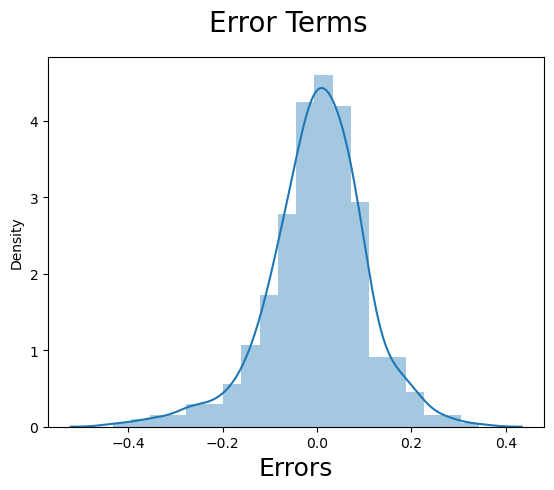

In [80]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [81]:
lr_4.resid.mean()

-2.1594926282905005e-16

#### Error Terms are normally distributed with mean as zero

<h2 style = "color : Blue">  Step 7: Making Predictions Using the Final Model </h2>

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. sixth model.

In [82]:
X_train_lm.columns

Index(['const', 'yr', 'workingday', 'Summer', 'Winter', 'MistCloud',
       'LightSnowRain', 'atemp', 'windspeed'],
      dtype='object')

#### Applying the scaling on the test sets

In [83]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 468 to 314
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             219 non-null    int64  
 1   workingday     219 non-null    int64  
 2   Summer         219 non-null    int32  
 3   Fall           219 non-null    int32  
 4   Winter         219 non-null    int32  
 5   MistCloud      219 non-null    int32  
 6   LightSnowRain  219 non-null    int32  
 7   atemp          219 non-null    float64
 8   hum            219 non-null    float64
 9   windspeed      219 non-null    float64
 10  cnt            219 non-null    int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 16.3 KB


In [84]:
df_test.describe()

,yr,workingday,Summer,Fall,Winter,MistCloud,LightSnowRain,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.452055,0.716895,0.237443,0.251142,0.228311,0.315068,0.027397,23.066174,61.092246,13.150063,4403.136986
std,0.498836,0.451539,0.426491,0.434663,0.420705,0.465607,0.163612,8.218533,14.807055,5.691017,1930.694541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.896500,18.791700,3.125550,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.940600,50.508150,9.021114,2798.500000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.852300,59.041700,12.652213,4334.000000
75%,1.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.000000,30.047100,71.413050,15.792336,5766.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.741450,97.250000,34.000021,8555.000000


In [85]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [86]:
y_test = df_test.pop('cnt')
X_test = df_test

In [87]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [88]:
X_test.columns

Index(['const', 'yr', 'workingday', 'Summer', 'Fall', 'Winter', 'MistCloud',
       'LightSnowRain', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [89]:
dropped_col

['hum', 'Fall']

In [90]:
# Creating X_test_m8 dataframe by dropping variables from X_test 

X_test_m4 = X_test.drop(dropped_col, axis = 1)

In [91]:
X_test_m4.columns

Index(['const', 'yr', 'workingday', 'Summer', 'Winter', 'MistCloud',
       'LightSnowRain', 'atemp', 'windspeed'],
      dtype='object')

In [92]:
# Making predictions using the Sixth model

y_pred = lr_4.predict(X_test_m4)

<h2 style = "color : Blue">  Step 8: Model Evaluation </h2>

Let's now plot the graph for actual versus predicted values.

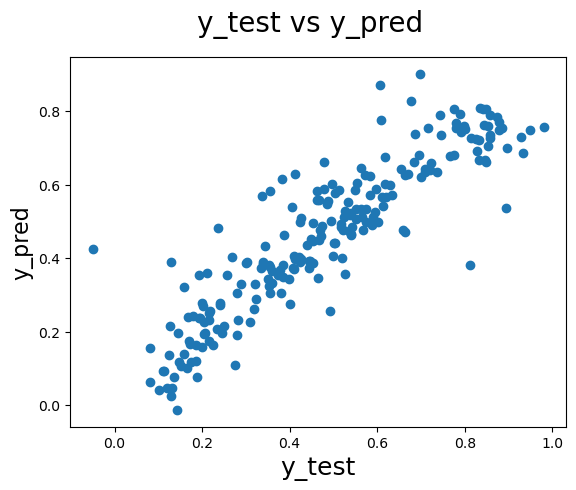

In [93]:
# Plotting y_test and y_pred to understand the spread


fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      
plt.show()




#### Observation: The points can be symmetrically distributed around a diagonal line. Hence the Linearity Assumption is validated

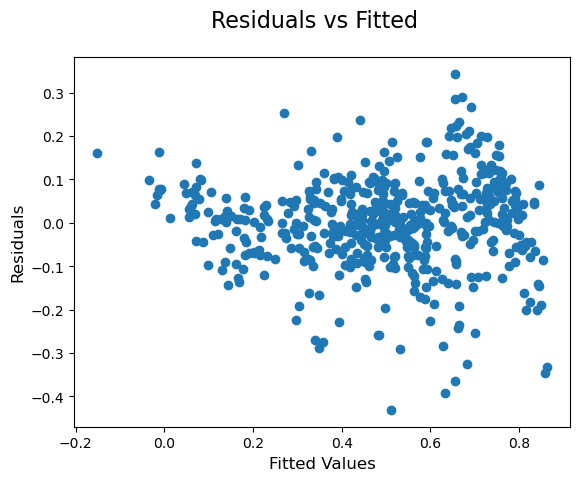

In [94]:
fitted_vals = lr_4.predict()
resids = lr_4.resid

fig = plt.figure()
plt.scatter(x=fitted_vals, y=resids)
fig.suptitle('Residuals vs Fitted', fontsize = 16)              # Plot heading 
plt.xlabel('Fitted Values', fontsize = 12)                          # X-label
plt.ylabel('Residuals', fontsize = 12)  
plt.show()   

The data points are spread across equally without a prominent pattern, it means the residuals have constant variance (homoscedasticity)

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7936629257893856

#### <h3 style = "color : Red">  R2-Score is 79.37% </h3>

 <h2 style = "color : Blue">  Step 9: Conclusion </h2>

In [96]:
np.round(lr_4.params,4)

const            0.0161
yr               0.2403
workingday       0.0224
Summer           0.0782
Winter           0.1445
MistCloud       -0.0770
LightSnowRain   -0.2486
atemp            0.6661
windspeed       -0.0762
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt = 0.2403  \times  yr + 0.0224  \times  workingday + 0.0782 \times Summer + 0.1445 \times Winter  - 0.0770 \times MistCloud - 0.2486 \times LightSnowRain   + 0.6661 \times atemp  - 0.0762 \times windspeed + 0.0161  $

#### Observations
 - `atemp` – Feeling Temperature is the most important factor in renting a bike. When temperature is warm, bike renting will be high
 - `Weather` – If there is snow or rain, bike renting will be considerably lesser than the Misty day
 - `Season` – Winter time will attract more bike renters than in Summer time
 - `Wind Speed` – When windspeed is high bike renting will be less
 - `Workingday` – Bike renting will be slightly more  during working days than in weekends or holidays
 - `Year` – 2019 is having higher number of bike renting than in 2018.

